# MLOps Exercise: Medical Image Classification with Chest X-Ray Images

## Introduction

In this exercise, you'll gain practical experience with MLOps (Machine Learning Operations) by working on a real-world problem: classifying chest X-ray images to diagnose pneumonia. You'll go through various stages, from data cleaning to deployment, learning how to manage an end-to-end machine learning pipeline.

### Prerequisites

- Basic understanding of Python
- Familiarity with machine learning concepts
- Experience with Jupyter Notebooks

### Tools and Libraries

- Python
- NumPy
- OpenCV
- TensorFlow/Keras
- scikit-learn
- Flask
- Matplotlib
- imbalanced-learn

These libraries should cover most requirements for this exercise, including data manipulation (NumPy, pandas), visualization (Matplotlib), machine learning (scikit-learn, TensorFlow), image processing (OpenCV), and class imbalance treatment (imbalanced-learn).

### Table of Contents

1. [Data Loading and Cleaning](#Data-Loading-and-Cleaning)
2. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
3. [Class Imbalance](#Class-Imbalance)
4. [Model Building](#Model-Building)
5. [Data Augmentation](#Data-Augmentation)
6. [Model Evaluation](#Model-Evaluation)
7. [Model Deployment (Bonus)](#Model-Deployment-(Bonus))


## Environment Setup

Before we begin, let's set up the environment. We'll install the necessary Python packages for this exercise.

```bash
pip install numpy pandas opencv-python matplotlib scikit-learn tensorflow flask
```

You can also create a `requirements.txt` file with the above packages and install them using `pip install -r requirements.txt`.
Be aware that you should download ipykernel and export your env to the jupyter notebook.
```bash
python -m ipykernel install --user --name=my_new_env
```

## Data Loading and Cleaning

### Objective

Load the dataset and clean it by removing corrupted images.

### Guidance

1. Download the Chest X-Ray Images (Pneumonia) dataset and place it in a directory accessible by this notebook. From https://ametice.univ-amu.fr
2. Unzip the dataset and explore its directory structure.
3. Load the images and labels for training.
4. Write a function to scan for and remove any corrupted or invalid images.

### Exercise

Now, load the dataset use the zipfile library and clean it by removing corrupted images. Write your code in the cell below.

```python
import zipfile

zip_file_path = 'path/to/your/zip/file.zip'
extract_path = 'path/to/extract/folder'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
```

After extracting, your dataset should have the following folder structure:

```
/
|-- test/
|   |-- NORMAL/
|   |-- PNEUMONIA/
|-- train/
|   |-- NORMAL/
|   |-- PNEUMONIA/
|-- val/
    |-- NORMAL/
    |-- PNEUMONIA/
```

You can point `train_path` and `test_path` to the `train` and `test` folders inside this extracted directory

In [1]:
import zipfile

zip_file_path = 'C:/Users/DESKTOP-FM/Desktop/Dataset.zip'
extract_path = 'C:/Users/DESKTOP-FM/Desktop/Dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [4]:
import os
import cv2

# Define the directory containing the extracted chest X-ray images
data_path = r'C:\Users\DESKTOP-FM\Desktop\MLOps TP1\Dataset\chest_xray'

list_dossiers = ["test", "val", "train"]
list_sous_dossiers = ["NORMAL", "PNEUMONIA"]

# Function to check if an image is corrupted
def is_image_corrupted(image_path):
    try:
        # Attempt to open and read the image using OpenCV
        img = cv2.imread(image_path)
        if img is None:
            return True
        return False
    except Exception as e:
        print(f"Error processing image {image_path}: {str(e)}")
        return True

for dossier in list_dossiers:
    for s_dossier in list_sous_dossiers:
        folder_path = os.path.join(data_path, dossier, s_dossier)
        
        # Check if the folder exists
        if not os.path.exists(folder_path):
            print(f"Folder not found: {folder_path}")
            continue
        
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)

            # Check if the image is corrupted
            if is_image_corrupted(image_path):
                print(f"Removing corrupted image: {image_path}")
                os.remove(image_path)

## Exploratory Data Analysis (EDA)

### Objective

Understand the dataset's basic statistics and visualize the data.

### Guidance

1. Use matplotlib to visualize some sample images from each class.
2. Investigate the distribution of classes (Pneumonia/Normal).

### Exercise

Perform exploratory data analysis on the dataset. Write your code in the cell below.


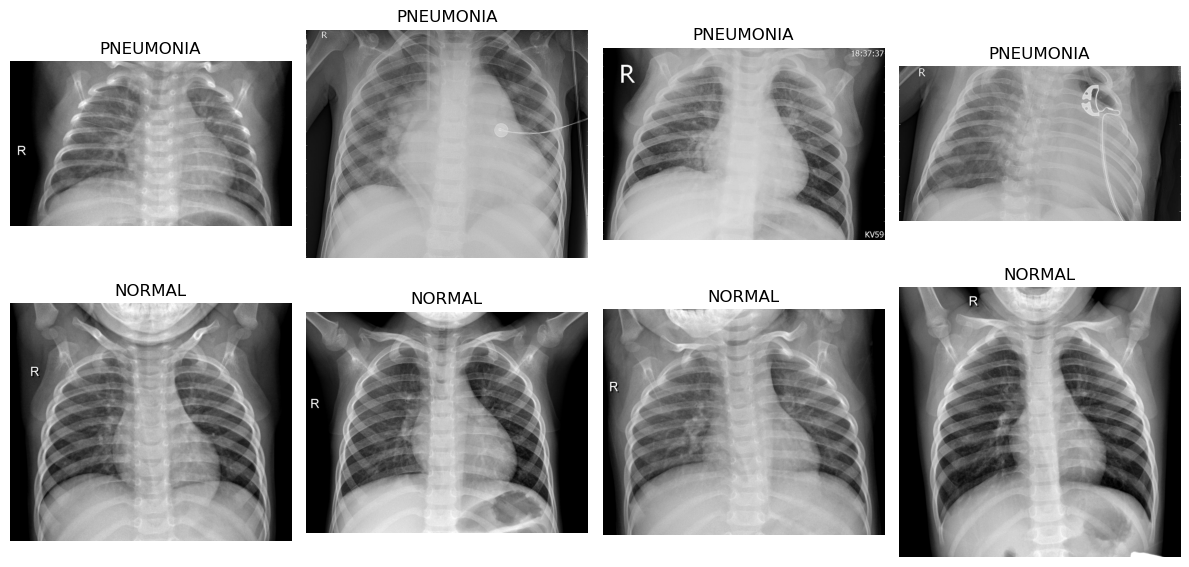

In [33]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to your dataset
dataset_dir = r'C:\Users\DESKTOP-FM\Desktop\MLOps TP1\Dataset\chest_xray\train'

# Define the class labels and corresponding directories
class_labels = ["PNEUMONIA", "NORMAL"]

# Create a subplot grid
num_rows, num_cols = 2, 4  # You can adjust these values
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

# Randomly select and display images from each class
for i, label in enumerate(class_labels):
    class_dir = os.path.join(dataset_dir, label)
    image_files = os.listdir(class_dir)
    random.shuffle(image_files)
    
    for j in range(num_cols):
        img_path = os.path.join(class_dir, image_files[j])
        img = mpimg.imread(img_path)
        axes[i, j].imshow(img, cmap='gray')  # Assuming grayscale images
        axes[i, j].set_title(label)
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Images count')

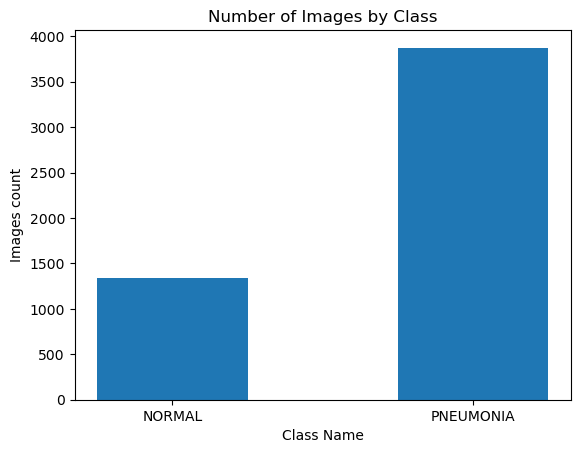

In [36]:
number_classes = {'NORMAL': len(os.listdir(os.path.join(dataset_dir, 'NORMAL'))),
                  'PNEUMONIA': len(os.listdir(os.path.join(dataset_dir, 'PNEUMONIA')))}
plt.bar(number_classes.keys(), number_classes.values(), width = .5)
plt.title("Number of Images by Class")
plt.xlabel('Class Name')
plt.ylabel('Images count')

Text(0, 0.5, 'Images count')

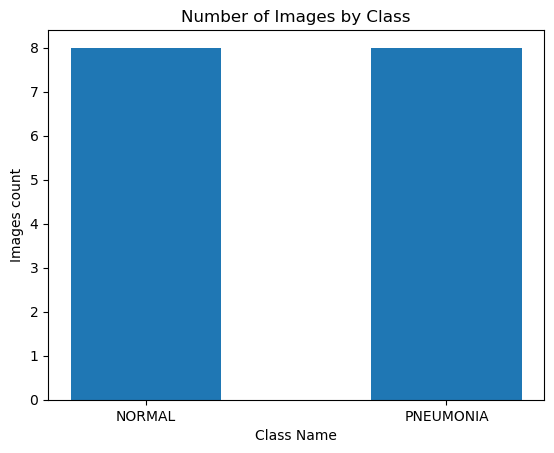

In [37]:
dataset_val = r'C:\Users\DESKTOP-FM\Desktop\MLOps TP1\Dataset\chest_xray\val'
number_classes = {'NORMAL': len(os.listdir(os.path.join(dataset_val, 'NORMAL'))),
                  'PNEUMONIA': len(os.listdir(os.path.join(dataset_val, 'PNEUMONIA')))}
plt.bar(number_classes.keys(), number_classes.values(), width = .5)
plt.title("Number of Images by Class")
plt.xlabel('Class Name')
plt.ylabel('Images count')

In light of the limited size of our validation dataset, our next step will involve splitting the training dataset to ensure a more robust and reliable validation process.

## Class Imbalance

### Objective

Understand how class imbalance affects model performance and learn ways to mitigate it.

### Guidance

1. Train a baseline model without accounting for class imbalance.
2. Evaluate its performance using metrics like accuracy, precision, recall, and F1-score.
3. Experiment with techniques like class weighting or oversampling methods like SMOTE to balance the classes.

### Exercise

Address the class imbalance and evaluate the impact on the model. Write your code in the cell below.


### Labeling dataset 

In [1]:
import numpy as np
import os
import cv2
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

def load_images_labels(imgs, labs, path, label):
    for image_file in os.listdir(path):
        img = cv2.imread(os.path.join(path, image_file))
        img = cv2.resize(img, (224, 224))
        img = img.astype(np.float32) / 255.0
        imgs.append(img)
        labs.append(label)

def labeling(imgs, labs, path):
    normal_path = os.path.join(path, 'NORMAL')
    pneumonia_path = os.path.join(path, 'PNEUMONIA')
    load_images_labels(imgs, labs, normal_path, 0)
    load_images_labels(imgs, labs, pneumonia_path, 1)

In [2]:
path_1 = r'C:\Users\DESKTOP-FM\Desktop\MLOps TP1\Dataset\chest_xray\train'
path_2 = r'C:\Users\DESKTOP-FM\Desktop\MLOps TP1\Dataset\chest_xray\test'
path_3 = r'C:\Users\DESKTOP-FM\Desktop\MLOps TP1\Dataset\chest_xray\val'
img_train, label_train = [], []
img_test, label_test = [], []
img_val, label_val = [], []
labeling(img_train, label_train, path_1)
labeling(img_test, label_test, path_2)
labeling(img_val, label_val, path_3)

In [3]:
x_train = np.array(img_train)
y_train = np.array(label_train)
x_test = np.array(img_test)
y_test = np.array(label_test)
x_val = np.array(img_val)
y_val = np.array(label_val)

### Creating Model

In [30]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import precision_score, f1_score
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report

model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the baseline model
history = model.fit(x_train, y_train, epochs=6, batch_size=64, validation_split=0.2)

# Evaluate the baseline model on the test set
baseline_metrics = model.evaluate(x_test, y_test)
baseline_accuracy = baseline_metrics[1]
y_pred_baseline = (model.predict(x_test) > 0.5).astype(int)

baseline_precision = precision_score(y_test, y_pred_baseline)

class_report = classification_report(y_test, y_pred_baseline)

print(f"Baseline Model Accuracy: {baseline_accuracy}")
print("Classification Report:\n", class_report)


Epoch 1/6
66/66 [==============================] - 64s 902ms/step - loss: 1.2845 - accuracy: 0.7874 - val_loss: 0.1286 - val_accuracy: 0.9636
Epoch 2/6
66/66 [==============================] - 62s 936ms/step - loss: 0.1382 - accuracy: 0.9535 - val_loss: 0.0882 - val_accuracy: 0.9732
Epoch 3/6
66/66 [==============================] - 60s 915ms/step - loss: 0.0831 - accuracy: 0.9741 - val_loss: 0.0619 - val_accuracy: 0.9780
Epoch 4/6
66/66 [==============================] - 59s 891ms/step - loss: 0.0637 - accuracy: 0.9811 - val_loss: 0.0466 - val_accuracy: 0.9818
Epoch 5/6
66/66 [==============================] - 60s 912ms/step - loss: 0.0528 - accuracy: 0.9854 - val_loss: 0.0322 - val_accuracy: 0.9875
Epoch 6/6
20/20 [==============================] - 3s 155ms/step
Baseline Model Accuracy: 0.7836538553237915
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.44      0.60       234
           1       0.75      0.99      0.85     

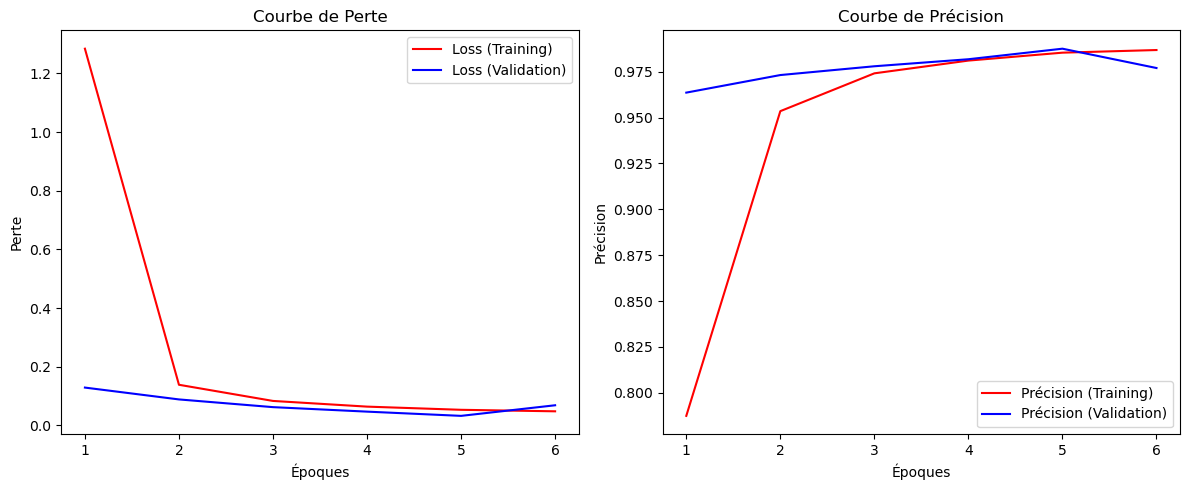

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Créez une figure avec deux sous-graphiques (loss et accuracy)
plt.figure(figsize=(12, 5))

# Subplot 1: Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Loss (Training)')
plt.plot(epochs, val_loss, 'b', label='Loss (Validation)')
plt.title('Courbe de Perte')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

# Subplot 2: Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Précision (Training)')
plt.plot(epochs, val_accuracy, 'b', label='Précision (Validation)')
plt.title('Courbe de Précision')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()

# Affichez les courbes
plt.tight_layout()
plt.show()


### Balancing Dataset

In [27]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

{0: 1.9448173005219984, 1: 0.6730322580645162}


In [28]:
c_weights = {i : value for i, value in enumerate(class_weights)}

model_balanced = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with class weights
model_balanced.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

# Train the balanced model with class weights
history_balanced = model_balanced.fit(x_train, y_train, epochs=6, batch_size=64, validation_split=0.2, class_weight=c_weights )

# Evaluate the balanced model on the test set
balanced_metrics = model_balanced.evaluate(x_test, y_test)
balanced_accuracy = balanced_metrics[1]

y_pred_balanced = (model_balanced.predict(x_test) > 0.5).astype(int)

class_report_balanced = classification_report(y_test, y_pred_balanced)

print(f"Balanced Model Accuracy: {balanced_accuracy}")
print("Classification Report:\n", class_report_balanced)

Epoch 1/6
66/66 [==============================] - 68s 972ms/step - loss: 1.7323 - accuracy: 0.7076 - val_loss: 0.3471 - val_accuracy: 0.8487
Epoch 2/6
66/66 [==============================] - 59s 891ms/step - loss: 0.1977 - accuracy: 0.9259 - val_loss: 0.1881 - val_accuracy: 0.9339
Epoch 3/6
66/66 [==============================] - 59s 889ms/step - loss: 0.1190 - accuracy: 0.9569 - val_loss: 0.1809 - val_accuracy: 0.9368
Epoch 4/6
66/66 [==============================] - 59s 901ms/step - loss: 0.0853 - accuracy: 0.9703 - val_loss: 0.1137 - val_accuracy: 0.9607
Epoch 5/6
66/66 [==============================] - 57s 860ms/step - loss: 0.0705 - accuracy: 0.9741 - val_loss: 0.1117 - val_accuracy: 0.9579
Epoch 6/6
20/20 [==============================] - 3s 168ms/step
Baseline Model Accuracy: 0.7932692170143127
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.47      0.63       234
           1       0.76      0.98      0.86     

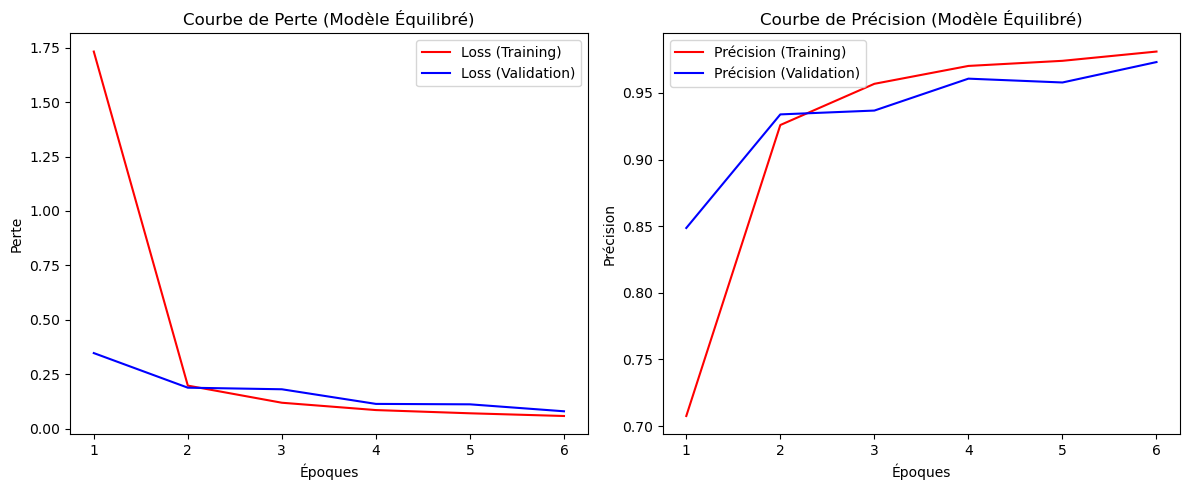

In [39]:
loss_balanced = history_balanced.history['loss']
val_loss_balanced = history_balanced.history['val_loss']
accuracy_balanced = history_balanced.history['accuracy']
val_accuracy_balanced = history_balanced.history['val_accuracy']
epochs_balanced = range(1, len(loss_balanced) + 1)

# Créez une figure avec deux sous-graphiques (loss et accuracy)
plt.figure(figsize=(12, 5))

# Subplot 1: Courbe de perte pour le modèle équilibré
plt.subplot(1, 2, 1)
plt.plot(epochs_balanced, loss_balanced, 'r', label='Loss (Training)')
plt.plot(epochs_balanced, val_loss_balanced, 'b', label='Loss (Validation)')
plt.title('Courbe de Perte (Modèle Équilibré)')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

# Subplot 2: Courbe de précision pour le modèle équilibré
plt.subplot(1, 2, 2)
plt.plot(epochs_balanced, accuracy_balanced, 'r', label='Précision (Training)')
plt.plot(epochs_balanced, val_accuracy_balanced, 'b', label='Précision (Validation)')
plt.title('Courbe de Précision (Modèle Équilibré)')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()

# Affichez les courbes pour le modèle équilibré
plt.tight_layout()
plt.show()

After balancing the dataset classes, we observed a change in the F1 score. That slight change in the F1 score suggests that balancing the dataset had a limited impact on the model's performance. It could indicate that the initial class imbalance may not have been a major factor affecting the model's ability to correctly classify instances.

## Model Building

### Objective

Build and train a deep learning model for image classification.

### Guidance

1. Use a Convolutional Neural Network (CNN) for this task.
2. Experiment with different architectures and hyperparameters.

### Exercise

Build and train your model. Write your code in the cell below.


In [42]:
model_complex = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_complex.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the baseline model
history_complex = model_complex.fit(x_train, y_train, epochs=6, batch_size=64, validation_split=0.2, class_weight=c_weights)

# Evaluate the baseline model on the test set
complex_metrics = model_complex.evaluate(x_test, y_test)
complex_accuracy = complex_metrics[1]
y_pred_complex = (model_complex.predict(x_test) > 0.5).astype(int)

class_report_complex = classification_report(y_test, y_pred_complex)

print(f"Complex Model Accuracy: {complex_accuracy}")
print("Classification Report:\n", class_report_complex)

Epoch 1/6
66/66 [==============================] - 195s 3s/step - loss: 0.6671 - accuracy: 0.7421 - val_loss: 0.2080 - val_accuracy: 0.9272
Epoch 2/6
66/66 [==============================] - 196s 3s/step - loss: 0.1053 - accuracy: 0.9614 - val_loss: 0.1855 - val_accuracy: 0.9435
Epoch 3/6
66/66 [==============================] - 196s 3s/step - loss: 0.0708 - accuracy: 0.9724 - val_loss: 0.1340 - val_accuracy: 0.9559
Epoch 4/6
66/66 [==============================] - 200s 3s/step - loss: 0.0539 - accuracy: 0.9811 - val_loss: 0.0946 - val_accuracy: 0.9713
Epoch 5/6
66/66 [==============================] - 200s 3s/step - loss: 0.0681 - accuracy: 0.9753 - val_loss: 0.0592 - val_accuracy: 0.9799
Epoch 6/6
20/20 [==============================] - 7s 369ms/step
Complex Model Accuracy: 0.7820512652397156
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.45      0.61       234
           1       0.75      0.98      0.85       390

    

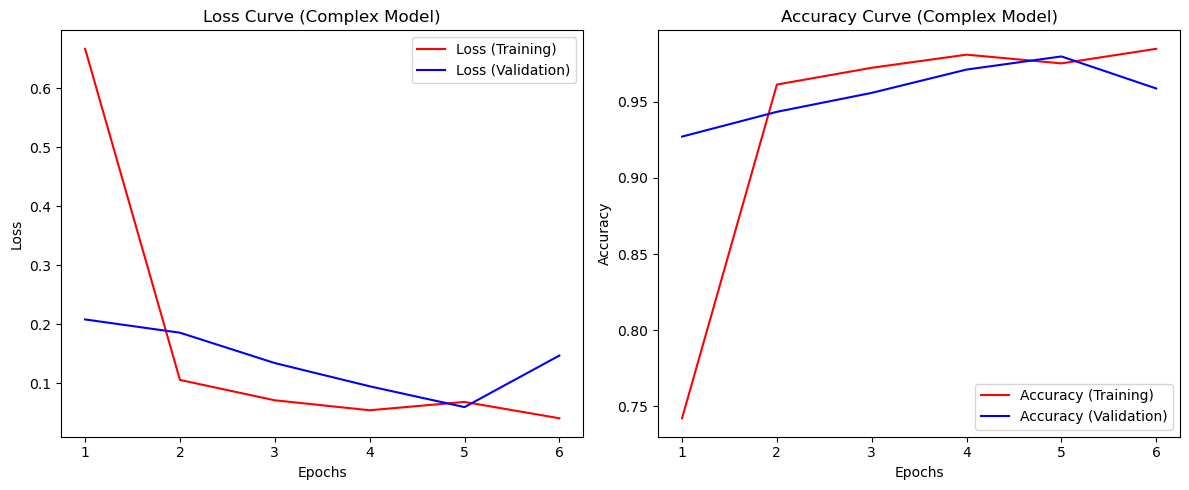

In [43]:
loss_complex = history_complex.history['loss']
val_loss_complex = history_complex.history['val_loss']
accuracy_complex = history_complex.history['accuracy']
val_accuracy_complex = history_complex.history['val_accuracy']
epochs_complex = range(1, len(loss_complex) + 1)

# Create a figure with two subplots (loss and accuracy)
plt.figure(figsize=(12, 5))

# Subplot 1: Loss curve for the complex model
plt.subplot(1, 2, 1)
plt.plot(epochs_complex, loss_complex, 'r', label='Loss (Training)')
plt.plot(epochs_complex, val_loss_complex, 'b', label='Loss (Validation)')
plt.title('Loss Curve (Complex Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Subplot 2: Accuracy curve for the complex model
plt.subplot(1, 2, 2)
plt.plot(epochs_complex, accuracy_complex, 'r', label='Accuracy (Training)')
plt.plot(epochs_complex, val_accuracy_complex, 'b', label='Accuracy (Validation)')
plt.title('Accuracy Curve (Complex Model)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Display the curves for the complex model
plt.tight_layout()
plt.show()

### Replacing Optimizer : RMSprop (Root Mean Square Propagation)

In [44]:
from tensorflow.keras import optimizers

model_RMS = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Change the optimizer to RMSprop
optimizer = optimizers.RMSprop(learning_rate=0.001)  # You can adjust the learning rate as needed

model_RMS.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the baseline model
history_RMS = model_RMS.fit(x_train, y_train, epochs=6, batch_size=64, validation_split=0.2, class_weight=c_weights)

# Evaluate the baseline model on the test set
RMS_metrics = model_RMS.evaluate(x_test, y_test)
RMS_accuracy = RMS_metrics[1]
y_pred_RMS = (model_RMS.predict(x_test) > 0.5).astype(int)

class_report_RMS = classification_report(y_test, y_pred_RMS)

print(f"Complex Model Accuracy: {RMS_accuracy}")
print("Classification Report:\n", class_report_RMS)

Epoch 1/6
66/66 [==============================] - 198s 3s/step - loss: 0.9029 - accuracy: 0.7011 - val_loss: 0.6365 - val_accuracy: 0.6676
Epoch 2/6
66/66 [==============================] - 200s 3s/step - loss: 0.2748 - accuracy: 0.8770 - val_loss: 0.5621 - val_accuracy: 0.7490
Epoch 3/6
66/66 [==============================] - 202s 3s/step - loss: 0.2803 - accuracy: 0.9178 - val_loss: 0.1377 - val_accuracy: 0.9511
Epoch 4/6
66/66 [==============================] - 200s 3s/step - loss: 0.1363 - accuracy: 0.9468 - val_loss: 0.0228 - val_accuracy: 0.9923
Epoch 5/6
66/66 [==============================] - 193s 3s/step - loss: 0.1266 - accuracy: 0.9518 - val_loss: 0.0917 - val_accuracy: 0.9693
Epoch 6/6
20/20 [==============================] - 8s 404ms/step
Complex Model Accuracy: 0.7339743375778198
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.30      0.46       234
           1       0.70      0.99      0.82       390

    

### Epochs

In [45]:
model_ep = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_ep.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the baseline model
history_ep = model_ep.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, class_weight=c_weights)

# Evaluate the baseline model on the test set
ep_metrics = model_ep.evaluate(x_test, y_test)
ep_accuracy = ep_metrics[1]
y_pred_ep = (model_ep.predict(x_test) > 0.5).astype(int)

class_report_ep = classification_report(y_test, y_pred_ep)

print(f"Complex Model Accuracy: {ep_accuracy}")
print("Classification Report:\n", class_report_ep)

Epoch 1/10
66/66 [==============================] - 203s 3s/step - loss: 0.4929 - accuracy: 0.8425 - val_loss: 0.2630 - val_accuracy: 0.9119
Epoch 2/10
66/66 [==============================] - 209s 3s/step - loss: 0.0931 - accuracy: 0.9684 - val_loss: 0.2107 - val_accuracy: 0.9330
Epoch 3/10
66/66 [==============================] - 208s 3s/step - loss: 0.0770 - accuracy: 0.9703 - val_loss: 0.2247 - val_accuracy: 0.9253
Epoch 4/10
66/66 [==============================] - 209s 3s/step - loss: 0.0503 - accuracy: 0.9811 - val_loss: 0.1921 - val_accuracy: 0.9416
Epoch 5/10
66/66 [==============================] - 206s 3s/step - loss: 0.0425 - accuracy: 0.9830 - val_loss: 0.0578 - val_accuracy: 0.9808
Epoch 6/10
66/66 [==============================] - 209s 3s/step - loss: 0.0326 - accuracy: 0.9878 - val_loss: 0.1540 - val_accuracy: 0.9559
Epoch 7/10
66/66 [==============================] - 212s 3s/step - loss: 0.0446 - accuracy: 0.9818 - val_loss: 0.0465 - val_accuracy: 0.9818
Epoch 8/10
66

### Epoch + Validation Dataset

In [46]:
model_ep_val = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_ep_val.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the baseline model
history_ep_val = model_ep_val.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.3, class_weight=c_weights)

# Evaluate the baseline model on the test set
ep_val_metrics = model_ep_val.evaluate(x_test, y_test)
ep_val_accuracy = ep_val_metrics[1]
y_pred_ep_val = (model_ep_val.predict(x_test) > 0.5).astype(int)

class_report_ep_val = classification_report(y_test, y_pred_ep_val)

print(f"Complex Model Accuracy: {ep_val_accuracy}")
print("Classification Report:\n", class_report_ep_val)

Epoch 1/10
58/58 [==============================] - 183s 3s/step - loss: 0.7947 - accuracy: 0.6365 - val_loss: 0.4156 - val_accuracy: 0.8409
Epoch 2/10
58/58 [==============================] - 183s 3s/step - loss: 0.1505 - accuracy: 0.9425 - val_loss: 0.1341 - val_accuracy: 0.9495
Epoch 3/10
58/58 [==============================] - 199s 3s/step - loss: 0.1167 - accuracy: 0.9575 - val_loss: 0.5170 - val_accuracy: 0.8173
Epoch 4/10
58/58 [==============================] - 204s 4s/step - loss: 0.1051 - accuracy: 0.9603 - val_loss: 0.0941 - val_accuracy: 0.9681
Epoch 5/10
58/58 [==============================] - 209s 4s/step - loss: 0.1049 - accuracy: 0.9617 - val_loss: 0.0697 - val_accuracy: 0.9738
Epoch 6/10
58/58 [==============================] - 198s 3s/step - loss: 0.0515 - accuracy: 0.9806 - val_loss: 0.1914 - val_accuracy: 0.9450
Epoch 7/10
58/58 [==============================] - 192s 3s/step - loss: 0.0322 - accuracy: 0.9888 - val_loss: 0.1512 - val_accuracy: 0.9527
Epoch 8/10
58

We keep the model we made In the balancing dataset part, and increase the number of epochs.

### Final Model

In [47]:
model_final = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with class weights
model_final.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

# Train the balanced model with class weights
history_final = model_final.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, class_weight=c_weights )

# Evaluate the balanced model on the test set
final_metrics = model_final.evaluate(x_test, y_test)
final_accuracy = final_metrics[1]

y_pred_final = (model_final.predict(x_test) > 0.5).astype(int)

class_report_final = classification_report(y_test, y_pred_final)

print(f"Model Accuracy: {final_accuracy}")
print("Classification Report:\n", class_report_final)

Epoch 1/10
66/66 [==============================] - 65s 964ms/step - loss: 0.7055 - accuracy: 0.7816 - val_loss: 0.1650 - val_accuracy: 0.9425
Epoch 2/10
66/66 [==============================] - 64s 977ms/step - loss: 0.1602 - accuracy: 0.9403 - val_loss: 0.1858 - val_accuracy: 0.9282
Epoch 3/10
66/66 [==============================] - 74s 1s/step - loss: 0.0943 - accuracy: 0.9669 - val_loss: 0.2490 - val_accuracy: 0.9042
Epoch 4/10
66/66 [==============================] - 67s 1s/step - loss: 0.0879 - accuracy: 0.9700 - val_loss: 0.0905 - val_accuracy: 0.9722
Epoch 5/10
66/66 [==============================] - 69s 1s/step - loss: 0.0554 - accuracy: 0.9806 - val_loss: 0.2317 - val_accuracy: 0.9128
Epoch 6/10
66/66 [==============================] - 68s 1s/step - loss: 0.0493 - accuracy: 0.9823 - val_loss: 0.1214 - val_accuracy: 0.9569
Epoch 7/10
66/66 [==============================] - 68s 1s/step - loss: 0.0384 - accuracy: 0.9883 - val_loss: 0.0762 - val_accuracy: 0.9751
Epoch 8/10
66/

## Data Augmentation

### Objective

Improve your model's performance by using data augmentation techniques.

### Guidance

1. Apply data augmentation techniques like rotation, flipping, and zooming to generate more training data.
2. Retrain your model using the augmented dataset.

### Exercise

Apply data augmentation techniques and evaluate the impact on the model. Write your code in the cell below.


In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


model_aug = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with class weights
model_aug.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

# Train the model with data augmentation
model_aug.fit(
    datagen.flow(x_train, y_train, batch_size=64, seed=42),
    epochs=10,
    validation_data=(x_val, y_val), 
    class_weight=c_weights
)

aug_metrics = model_aug.evaluate(x_test, y_test)
aug_accuracy = aug_metrics[1]
y_pred_aug = (model_aug.predict(x_test) > 0.5).astype(int)

class_report_aug = classification_report(y_test, y_pred_aug)

print(f"Model Accuracy: {aug_accuracy}")
print("Classification Report:\n", class_report_aug)

Epoch 1/10
66/66 [==============================] - 121s 2s/step - loss: 0.8258 - accuracy: 0.6213 - val_loss: 0.4212 - val_accuracy: 0.8649
Epoch 2/10
66/66 [==============================] - 104s 2s/step - loss: 0.4068 - accuracy: 0.8150 - val_loss: 0.2802 - val_accuracy: 0.8956
Epoch 3/10
66/66 [==============================] - 102s 2s/step - loss: 0.3763 - accuracy: 0.8356 - val_loss: 0.3122 - val_accuracy: 0.8745
Epoch 4/10
66/66 [==============================] - 112s 2s/step - loss: 0.3561 - accuracy: 0.8483 - val_loss: 0.3036 - val_accuracy: 0.8841
Epoch 5/10
66/66 [==============================] - 102s 2s/step - loss: 0.3516 - accuracy: 0.8502 - val_loss: 0.2877 - val_accuracy: 0.8822
Epoch 6/10
66/66 [==============================] - 117s 2s/step - loss: 0.3496 - accuracy: 0.8526 - val_loss: 0.3267 - val_accuracy: 0.8697
Epoch 7/10
66/66 [==============================] - 127s 2s/step - loss: 0.3300 - accuracy: 0.8627 - val_loss: 0.2385 - val_accuracy: 0.9090
Epoch 8/10
66

## Model Evaluation

### Objective

Evaluate your model's performance using different metrics and visualization tools.

### Guidance

1. Use metrics like accuracy, precision, recall, and F1-score for evaluation.
2. Plot confusion matrices and ROC curves to visualize your model's performance.

### Exercise

Evaluate your model and interpret the results. Write your code in the cell below.


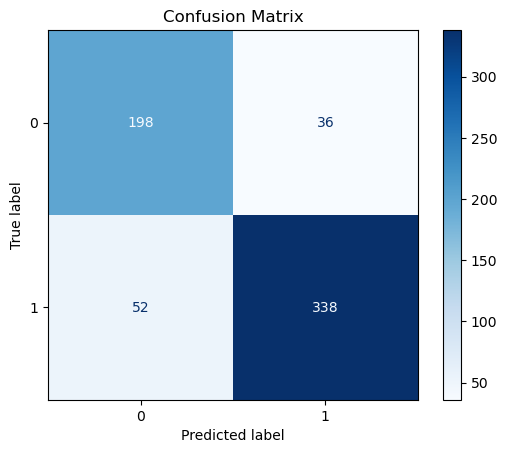

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

cm = confusion_matrix(y_test, y_pred_aug)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

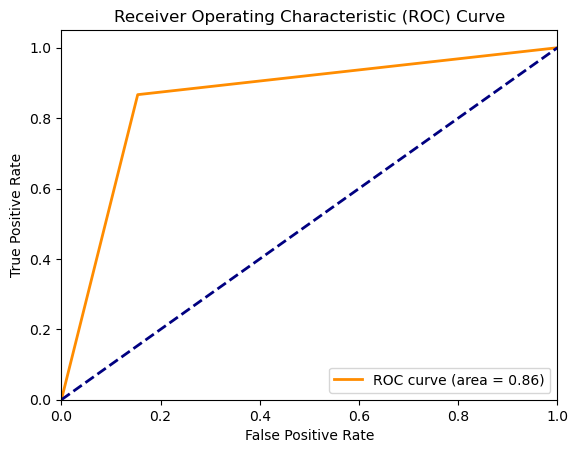

In [55]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_aug)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Model Deployment (Bonus)

### Objective

Learn the basics of deploying a machine learning model.

### Guidance

1. Save your trained model.
2. Use Flask to create a simple REST API to serve your model.

### Exercise

Deploy your model using Flask. Write your code in the cell below.


In [67]:
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


app = Flask(__name__)


def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize the pixel values
    return img

@app.route('/predict', methods=['GET', 'POST'])

def predict():
    try:
        img_path = r'C:\Users\DESKTOP-FM\Downloads\image_lungs.jpeg'
        img = preprocess_image(img_path)

        # Make a prediction using the loaded model
        prediction = model_aug.predict(img)

        # Convert the prediction to a JSON response
        response = {'prediction': 'pneumonia' if prediction[0][0] > 0.5 else 'normal'}

        # Remove the temporary image file
        os.remove(img_path)
        return jsonify(response)
    
    except Exception as e:
        return jsonify('error')


if __name__ == '__main__':
    app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [09/Oct/2023 21:57:18] "GET / HTTP/1.1" 404 -


1/1 [==============================] - 0s 85ms/step


127.0.0.1 - - [09/Oct/2023 21:57:24] "GET /predict HTTP/1.1" 200 -



### Next Steps

1. Experiment with more advanced architectures and hyperparameters.
2. Deploy your model
3. Integrate your model into a web application or other services.
4. Learn more about MLOps best practices and tools.


